# İsim Soyisim: Ömer Cebeci
# Numara: 171024007
# Ekip No A10

In [199]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
import math
%matplotlib notebook

In [200]:
def zplane(b,a):

	# Input: numerator and denominator coefficients:
	zeross,poless,k = sgnl.tf2zpk(b, a)
	if not zeross.size:
		zeross = np.zeros(len(poless))
		
	if not poless.size:
		poless = np.zeros(len(zeross))

	tol = 1e-4

	real_p = np.real(poless).copy()
	real_z = np.real(zeross).copy()
	imag_p = np.imag(poless).copy()
	imag_z = np.imag(zeross).copy()

	if not real_z.size:
		real_z[abs(real_z) < tol] = 0
	if not imag_z.size:
		imag_z[abs(imag_z) < tol] = 0
	if not real_p.size:
		real_p[abs(real_p) < tol] = 0
	if not imag_p.size:
		imag_p[abs(imag_p) < tol] = 0

	z = np.round(real_z,2) + 1j*np.round(imag_z,2)
	p = np.round(real_p,2) + 1j*np.round(imag_p,2)

	# plot the unit circle
	N = 128
	m = np.arange(0,N,1)
	unitCircle = np.exp(1j*m*2*np.pi/N)

	plt.figure()
	plt.plot(np.real(unitCircle), np.imag(unitCircle), 'b--', linewidth=0.3)
	plt.xlabel('Real Part'), plt.ylabel('Imaginary Part')

	# calculate the plot limits
	Cz, z_counts = np.unique(z, return_counts=True)
	Cp, p_counts = np.unique(p, return_counts=True)

	zz = [idx1 for idx1, valz in enumerate(z_counts) if valz > 1]
	pp = [idx2 for idx2, valp in enumerate(p_counts) if valp > 1]
	zval = z_counts[zz]
	pval = p_counts[pp]
	zs = Cz[zz]
	ps = Cp[pp]

	real_roots = np.concatenate((np.real(p),np.real(z)))
	imag_roots = np.concatenate((np.imag(p),np.imag(z)))

	# adjust plot limits
	xlower = min(-1, min(real_roots)) - 0.3
	xupper = max(1,  max(real_roots)) + 0.3
	ylower = min(-1, min(imag_roots)) - 0.3
	yupper = max(1,  max(imag_roots)) + 0.3
	plt.xlim(xlower, xupper), plt.ylim(ylower, yupper)

	# plot axes
	Xaxis = np.arange(xlower, xupper, 0.1)
	Yaxis = np.arange(ylower, yupper, 0.1)
	plt.plot(np.real(Xaxis), np.imag(Xaxis), 'b--', linewidth=0.3)
	plt.plot(np.imag(Yaxis), np.real(Yaxis), 'b--', linewidth=0.3)

	# plot poles and zeros
	plt.plot(np.real(z), np.imag(z), 'ro',  markerfacecolor = 'none')
	plt.plot(np.real(p), np.imag(p), 'rx')

	if zz:
		txtz = str(zval)[1:-1]
		plt.annotate(txtz, xy=(np.real(zs)+0.1,np.imag(zs)+0.1))
		
	if pp:
		txtp = str(pval)[1:-1]
		plt.annotate(txtp, xy=(np.real(ps)+0.1,np.imag(ps)+0.1))

	plt.grid()
	plt.show()


# Örnek Kod 7

In [4]:
z=np.array([0]); #sistemin sıfırları 
p=np.array([1.0/4,1.0/2])# sistemin kutupları
b,a=sgnl.zpk2tf(z,p,1)
print(a)# paydanin katsayıları
print(b)#payın katsayıları
#zpk2tf ile sistemin kutup ve sıfırlarını yazıp pay ve paydanın kat sayıları bulduk

[ 1.    -0.75   0.125]
[1. 0.]


In [5]:
# alternative way to expand a product:
a=sgnl.convolve(np.array([1,-1/4]),np.array([1,-1/2]))
print(a)

[ 1.    -0.75   0.125]


In [6]:
## basit kesirlere ayırma yöntemi 
r,p,k =sgnl.residuez(b,a)
print(r)
print(p)
print(k)

[-1.  2.]
[0.25 0.5 ]
[0.]


In [ ]:
#r:is the numerator of each term
# is the pole of the system
# is the polynomial term (if any)


# Örnek Kod 8

C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

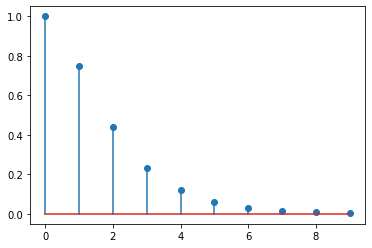

In [2]:
num=np.array([1,0,0])# zeros
denum=np.array([1,-3.0/4,1.0/8])#poles
n,x =sgnl.dimpulse((num,denum,1),x0=0,n=10)
plt.stem(n,np.squeeze(x))

# Örnek Kod 9

In [3]:
n=np.arange(0,10,1)
xpf=-(1.0/4)**n+2*(1.0/2)**n

num=np.array([1,0,0])# zeros
denum=np.array([1,-3.0/4,1.0/8])#poles

n1,xpse=sgnl.dimpulse((num,denum,1),x0=0,n=10)
xpse=np.squeeze(xpse)


C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 0, 'index vector (sample)')

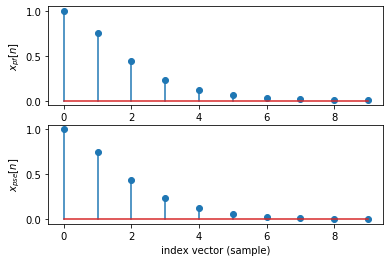

In [4]:
plt.subplot(2,1,1), plt.stem(n, xpf), plt.ylabel('$x_{pf}[n]$')
plt.subplot(2,1,2), plt.stem(n, xpse), plt.ylabel('$x_{pse}[n]$')
plt.xlabel('index vector (sample)')

# Örnek Kod 10

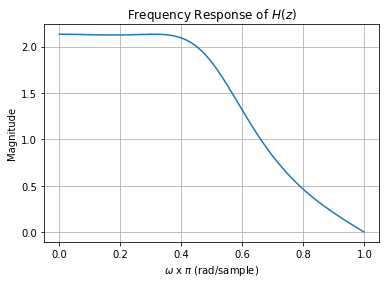

In [5]:
zeros=np.array([-1])
poles=np.array([1j/2,-1j/2,1.0/4])
w,H=sgnl.freqz_zpk(zeros,poles,1)
plt.plot(w/np.pi,abs(H))
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()


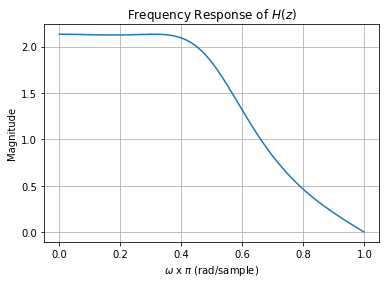

In [6]:
num,denum=sgnl.zpk2tf(zeros,poles,1)
w1,H_tf =sgnl.freqz(num,denum)
plt.figure()
plt.plot(w1/np.pi, abs(H_tf)) # plot the magnitude in logarithmic scale with b
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

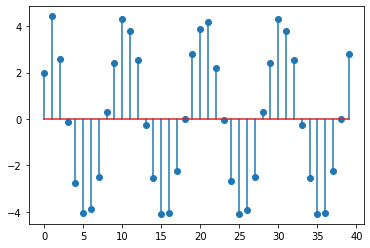

In [7]:
n=np.arange(0,40,1)
xn=2*np.cos(0.2*np.pi*n)+np.sin(0.9*np.pi*n)
yn=sgnl.lfilter(num,denum,xn)
plt.figure()
plt.stem(n,yn)

# Örnek Kod 11

[1. 1.]
[1.     0.25   0.25   0.0625]


<IPython.core.display.Javascript object>


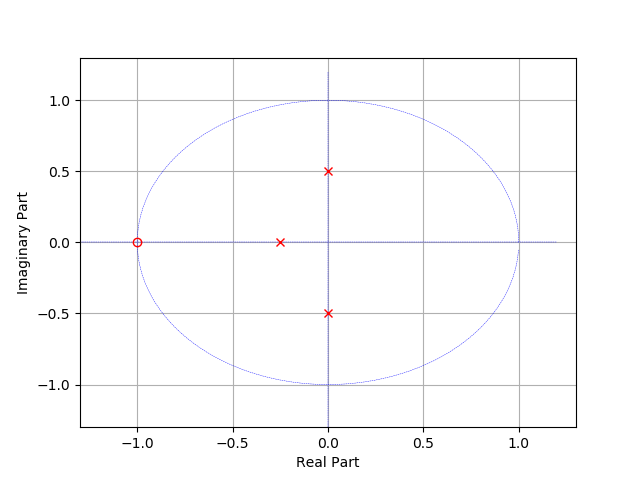

In [58]:
zeros=np.array([-1])
poles=np.array([-1j/2,1j/2,-1/4])
k=1
b,a =sgnl.zpk2tf(zeros,poles,k)
print(b)
print(a)
zplane(b,a)

# Z-Transform -> Frequency Response

<IPython.core.display.Javascript object>


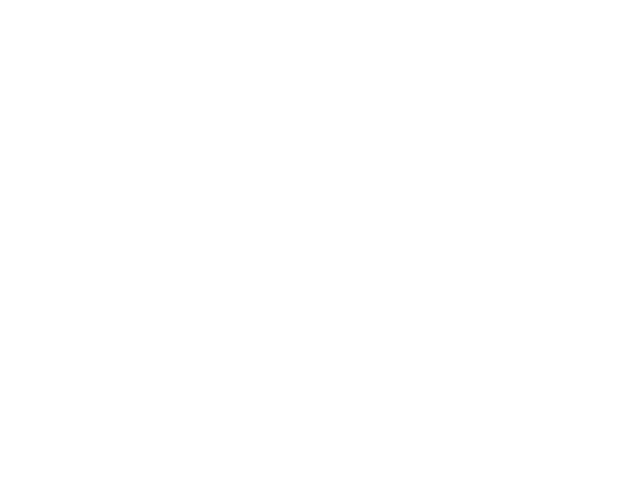

<IPython.core.display.Javascript object>


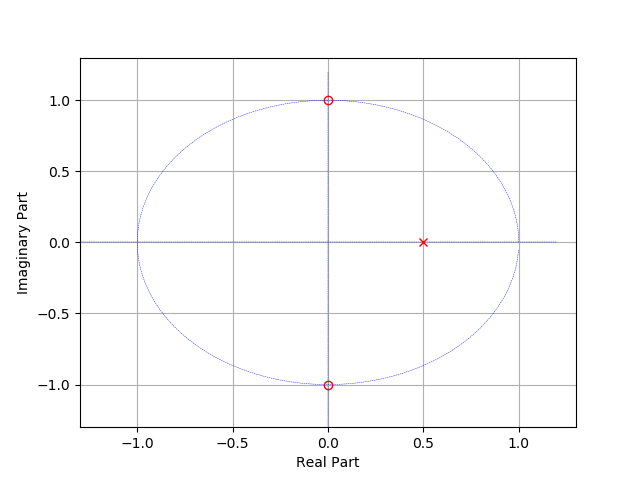

In [59]:
num = np.array([1, 0, 1]) # note that the coeff of z^(-1) term is zero.
denum = np.array([1, -1.0/2])
plt.figure()
zplane(num,denum)

In [60]:
# Now, we define the frequency response as:
w = np.linspace(0, 2*np.pi, 100)

<IPython.core.display.Javascript object>


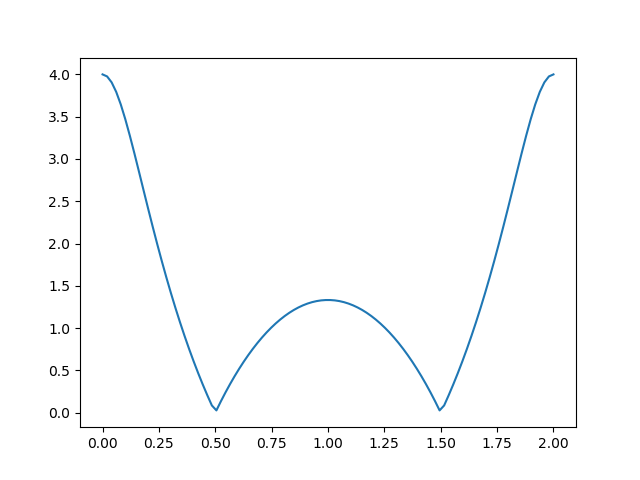

In [61]:
Hw = (1+np.exp(-2*1j*w))/(1-(1/2)*np.exp(-1j*w))
# alternatively, we could use the sgnl.freqz_zpk() function to calculate the Frequen
# or sgnl.freqz() function to calculate from the coefficients.
Hw_abs = abs(Hw)
plt.figure()
plt.plot(w/np.pi, Hw_abs)

# ÖDEV-4 SORULAR
# Soru-1 
# A)

# z dönüşümü uygulanırsa:
# $ Y(Z)=(1/2)*Y(Z)*Z^{-1}-Y(Z)*(-4*Z^{-2})+2*Y(Z)*Z^{-3}+X(Z)*
  (2/3)*X(Z)*Z^{-1}+(1/9)*X(Z)*Z^{-2} $ 
  
# $Y(Z)*(1-(1/2)*Z^{-1}+4*Z^{-2}-2*Z^{-3})= X(Z)*(1+(2/3)*Z^{-1}+(1/9)*Z^{-2}) $

# $ H(Z)=[\frac{Y(Z)} {X(Z)}] = [\frac{(1+(2/3)*Z^{-1}+(1/9)*Z^{-2})} {1-(1/2)*Z^{-1}+4*Z^{-2}-2*Z^{-3}}] $

# 1)b

<IPython.core.display.Javascript object>


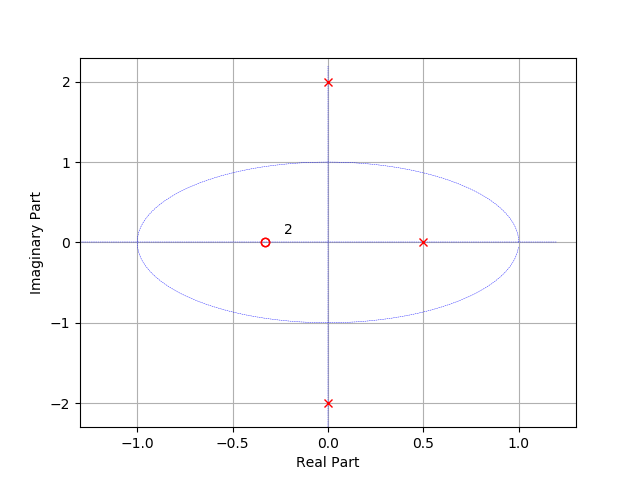

In [334]:
num=np.array([1,2.0/3,1.0/9])# z^-3 ün katsayısı 0 dır.
denum=np.array([1.0,-1.0/2,4.0,-2.0])

zplane(num,denum)


 # 1c)

# c.1
sistemin dürtü cevabının,h[n]=0 n<0 koşulunu sağlaması demek sistemin nedensel olması demektir.Sistemi nedensel yapabilmek için işaretin sağ yanlı olması gerekir.Sağ yanlı bir işaret için ROC en dıştaki kutuptan dışarı doğru olmalıdır.Aynı zamanda ROC'un içerisinde hiç bir kutup noktası bulunmaması gerekir.
  ROC --> |z|>2
# c.2
eğer sistemin Fourier dönüşümü varsa roc Ne olmalıdır? 

c.1 şıkkında olduğu gibi roc eğer $0.5<|z|<2$ olursa birim çemberi içerir.Sinyalin ROC'unun birim çemberi içermesi demek fourier dönüşümü var demektir.

--> |z|<0.5 olursa ROC, birim çemberi kapsamaz

--> |z|<2 olursa ROC, kutup noktası içerir gene olmaz.


# 1d)

<IPython.core.display.Javascript object>


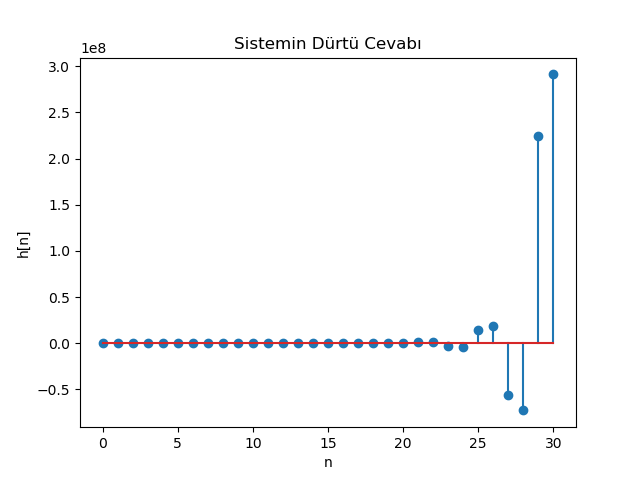

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [335]:
n,x=sgnl.dimpulse((num,denum,1),x0=0,n=31)
plt.figure()
plt.stem(n, np.squeeze(x))
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Sistemin Dürtü Cevabı")
plt.show()
##Aşağıdaki grafik c.1 durumu içindir

Bir LTI sistemin kararlı olması için $\sum_{n=-\infty}^\infty |h[n]| < \infty $
şartının sağlanması gerekir. Yukarıdaki grafik incelendiğinde |h[n]| değerleri sürekli arttamakta bundan dolayı |h[n]|'lerin toplamı sonlu bir sayıya yaklaşamaz.$Sonuç olarak sistem kararlı değildir$ 

# 1e)

Nedensel olabilmesi için sistemin sağ yanlı olması gerekir.Kararlılık şartı ise sistemin ROC'unun birim çember içermesi dir.Bu sistem sağ yanlı olduğu için ve |z|>2 olduğu için z hiç bir zaman 1 ve -1 arasında olamaz bu yüzden sistem hem kararlı hem nedensel olamaz. 
Hem kararlı hemde nedensel olabilmesi için z=2j ve z=-2j köklerinin bulunmaması gerekir.Bunu sağlamak için sistem (z+2j) ve (z-2j) ile çarpılması gerekir.(gene yazımı düzelt!!!!!)

# 1f)

<IPython.core.display.Javascript object>


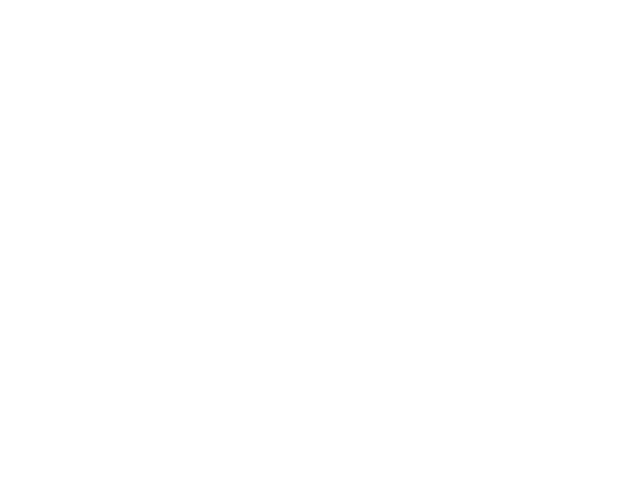

<IPython.core.display.Javascript object>


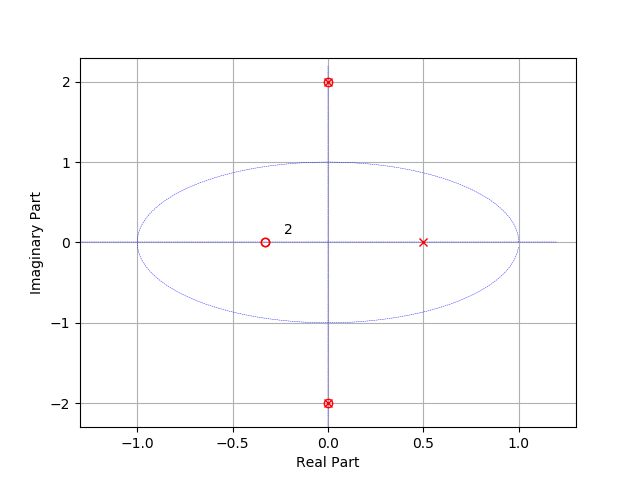

5
4


In [203]:
num=np.array([1,2/3,37/9,8/3,4/9])# z^-3 ün katsayısı 0 dır.
denum=np.array([1.0,-1.0/2,4.0,-2.0])
plt.figure()
zplane(num,denum)
print(len(num))
print(len(denum))
#NOT: ÇÖZEMEDİĞİM BİR SEBEPTEN DOLAYI BOŞ FİGURE AÇIYOR...

$ Yukarıda \space çizilen \space zero-pole \space diyagramında \space ,z=2j \space ve \space z=-2j \space hem \space kutup \space hemde \space sıfır \space noktası \space olarak \space gözükmektedir \space.Bu \space sebeple \space sadeleştirme \space sonucu \space bu \space değerler \space gider. \space $

$ \space Kökler \space sadeleştiğinde \space sistem \space hem \space kararlı \space hem \space de \space nedensel \space olmuş \space olur. $ 

<IPython.core.display.Javascript object>


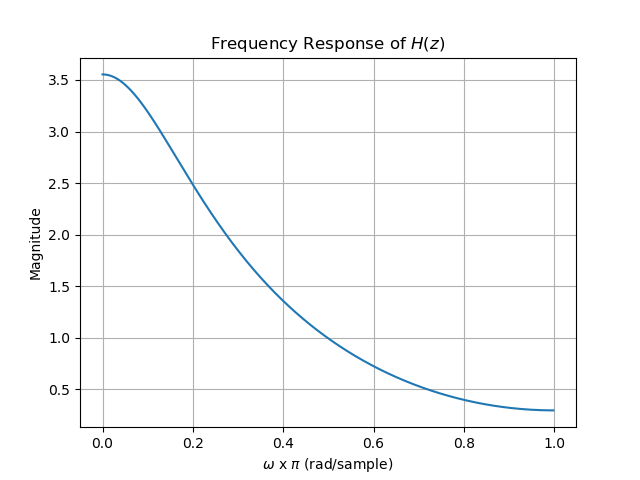

<IPython.core.display.Javascript object>


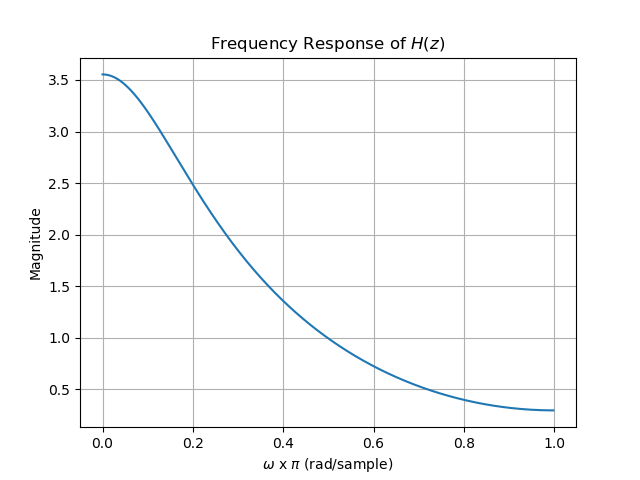

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<IPython.core.display.Javascript object>


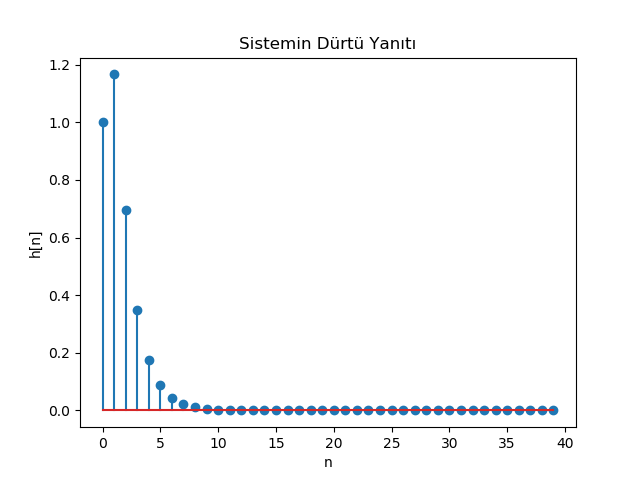

C:\anaconda\lib\site-packages\ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

In [336]:
def dirac(m):
    if m == 0:
        return 1
    else:
        return 0
    

 

zeros = np.array([-0.333,-0.333]) 
poles = np.array([0.5])
num   = np.array([1, 2.0/3, 37.0/9, 8.0/3, 4.0/9 ])
denum = np.array([0, 1, -1.0/2, 4, -2])

 

w, H = sgnl.freqz_zpk(zeros, poles, 1)
plt.figure()
plt.plot(w/np.pi, abs(H)) 
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

 

num, denum = sgnl.zpk2tf(zeros, poles, 1) 
w1, H_tf = sgnl.freqz(num, denum)
plt.figure()
plt.plot(w1/np.pi, abs(H_tf)) 
plt.title('Frequency Response of $H(z)$')
plt.ylabel('Magnitude'), plt.xlabel('$\omega$ x $\pi$ (rad/sample)')
plt.grid()

#Yukarıdaki iki grafik çizdirme işleminin sonucunda farklı yollardan yapılmasına rağmen aynı sonuç geldiği gözlemlenmiştir. 

n = np.arange(0, 40, 1) 
xn = np.zeros(len(n))

 

for i in range(len(n)):
    xn[i] = dirac(n[i])
print(xn)

 

yn = sgnl.lfilter(num,denum,xn)
plt.figure()
plt.title("Sistemin Dürtü Yanıtı")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.stem(n, yn)

Yukarıda çizilen sistemin dürtü cevabının grafiğine bakılırsa h[n]'lerin mutlak toplamlarının sonsuz bir sayıya gidemeyeceği görülür.


# Soru-2

# h[n] nin ile hesaplanması.
$ H(Z)= \frac{z^{2}}{(z+1)*((z-1)^{2})} =
\frac{K1}{z+1} * \frac{K2}{z-1} * \frac{K3}{(z-1)^{2}} $

1) Eşitliğin her tarafı (z+1) ile çarpılıp z=-1 yerine konulursa
K1 = $\frac{z^{2}} {((z-1)^{2})} $ ,(Z=-1)
$K1=0.25$


2)Eşitliğin her tarafı $(z-1)^{2}$ ile çarpılıp z=1 konulursa K3 hesaplanır.
$K3= \frac{z^{2}}{(z+1)}, z=1 $
$K3=3/4$


3)Eşitliğin her tarafı  $(z-1)^{2}$ ile çarpılıp daha sonra her iki tarafın z'ye göre türevi alınıp z=1 yerine konulursa K2 hesaplanır.
K2=0.5


Sonuç olarak H(Z)= $ [\frac{0.25} {1+z}] + [\frac{0.75} {z-1}]+ [\frac{0.5}{(z-1)^{2}}]  $

$[\frac{0.25} {1+z}] = [\frac{0.25*z^{-1}*z} {1+z}]= (1/4)*(-1)^{n-1}* u[n-1] $


$[\frac{0.75} {1-z}]= [\frac{0.75*z*z^{-1}} {z-1}] = (3/4)* 1^{n-1} * u[n-1]$ 


$ [\frac{0.5}{(z-1)^{2}}] =  [\frac{0.5* z^2 * z^-2}{(1-z)^{2}}] = 0.5 *(n-1) * 1^{n-1}* u[n-1] $

Not= Sistem Nedensel olduğu için ROC Her zaman sağ yanlı seçilmiştir.

$h[n]=(1/4)*(-1)^{n-1}* u[n-1] + (3/4)* 1^{n-1} * u[n-1] + 0.5 *(n-1) * 1^{n-1}* u[n-1] $

<IPython.core.display.Javascript object>


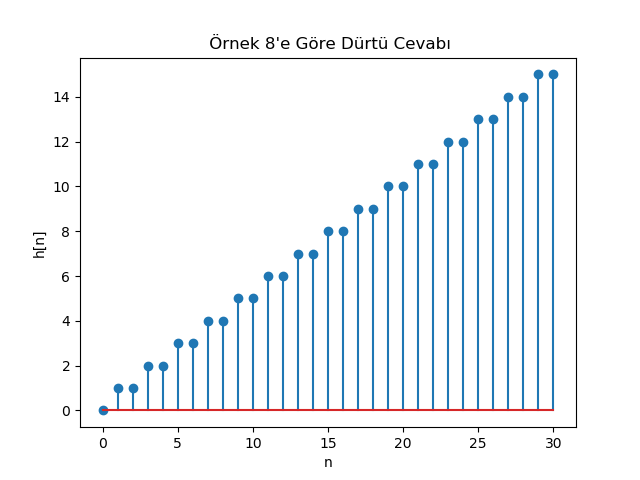

C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, " Örnek 8'e Göre Dürtü Cevabı")

In [296]:
# örnek 8'e göre Sistemin Dürtü Cevabının Bulunması
num = np.array([0,1,0,0]) 
denum = np.array([1, -1,-1,1]) # coeffs of denum
n, x = sgnl.dimpulse((num, denum, 1),x0=0, n=31)
plt.figure()
plt.stem(n,np.squeeze(x))
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title(" Örnek 8'e Göre Dürtü Cevabı")


In [310]:
# örnek 7'e göre dürtü cevabının bulunması
def step(n):
    if n >= 0:
        return 1
    else:
        return 0

In [311]:
z = np.array([0,0]) # çift katlı kökler iki kere yazılmıştır.
p = np.array([-1,1,1]) #  çift katlı kökler iki kere yazılmıştır.
b, a = sgnl.zpk2tf(z, p, 1)

In [312]:
r, p, k = sgnl.residue(b,a) #
print(r)
print(p)
print(k)

[0.25 0.75 0.5 ]
[-1.  1.  1.]
[0.]


Yukarıda elde edilen değerler aiağıdaki gibi yazılarak  grafik çizimi yapılmıştır:
$ [\frac{r[0]} {1-p[0]*z^{-1}}] + [\frac{r[1]} {1-p[1]*z^{-1}}] + k[0]+ k[1] z^-1 +.... $

# $ [\frac{0.25} {1+1*z^{-1}}] + [\frac{0.75} {1-1*z^{-1}}]+ [\frac{0.5}{(1-1*z^{-1})^{2}}]  $
# yukarıda yazılan kodlar sonucunda bulunan h[n],el ile hesaplanan h[n] ile aynı şekilde gelmiştir.

In [313]:
n=np.arange(0,31,1)
xn=np.zeros(len(n))
for k in range(1,len(n)):
     xn[k] = (1/4)*(math.pow(-1,(n[k-1]))*step(n[k-1])) + (3/4)*step(n[k-1]) + (1/2)*((n[k-1]))*step((n[k-1]))

<IPython.core.display.Javascript object>


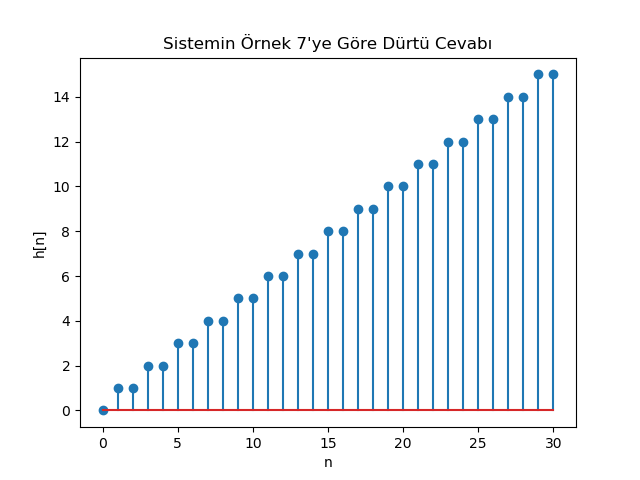

[ 0.  1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.  9.
  9. 10. 10. 11. 11. 12. 12. 13. 13. 14. 14. 15. 15.]


C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


In [314]:
plt.figure()
plt.stem(n,xn)
plt.xlabel("n")
plt.title("Sistemin Örnek 7'ye Göre Dürtü Cevabı")
plt.ylabel("h[n]")
print(xn)
    

<IPython.core.display.Javascript object>


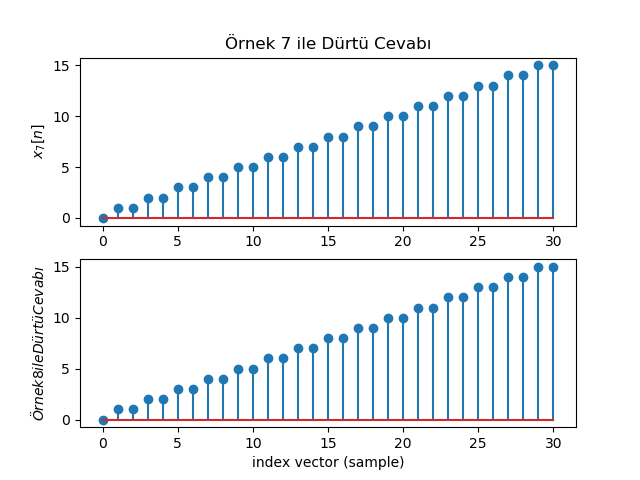

C:\anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
C:\anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 0, 'index vector (sample)')

In [317]:
# örnek 9 için hem yorum hem de birlikte çizdirme
#örnek 7 
n=np.arange(0,31,1)
xn=np.zeros(len(n))
for k in range(1,len(n)):
     xn[k] = (1/4)*(math.pow(-1,(n[k-1]))*step(n[k-1])) + (3/4)*step(n[k-1]) + (1/2)*((n[k-1]))*step((n[k-1]))
#örnek 8 
num   = np.array([0,  1, 0, 0]) # we add zeros to match the size of num and
denum = np.array([1, -1, -1, 1]) # coeffs of denum
n8, x8 = sgnl.dimpulse((num, denum, 1),x0=0, n=31)

plt.figure()
plt.subplot(2,1,1), plt.stem(n, xn), plt.ylabel('$x_{7}[n]$'),plt.title("Örnek 7 ile Dürtü Cevabı")
plt.subplot(2,1,2), plt.stem(n8, np.squeeze(x8)), plt.ylabel('$Örnek 8 ile Dürtü Cevabı$')
plt.xlabel('index vector (sample)')



# Yukarıdaki  grafiklerde de görüldüğü üzere iki farklı yoldan da sistemin dürtü cevabı aynı bulunmuştur.El ile hesaplanan h[n] ile de örnek 7 sonucu elde edilen h[n] aynı gelmiştir.

# Soru-3

$ H(Z)= [ \frac {1+3*z^-1+(11/6)*z^-2+1/2*z^-2} {1+(5/6)*z^-1-1+(1/6) z^-2}] $ 

$ Polinom \space bölmesi \space yapıldığı \space zaman \space :$

$H(Z)= 2*z^-1 +1 + \frac {(1/6)*z^-1} {1+5/6*z^-1+(1/6)*z^-2} $

$H(Z)= 2*z^-1 +1 + \frac {1} {(1/3)*z^-1+1} + \frac {-1} {(1/2)*z^-1+1}$

$Sistem\space nedensel \space olarak \space verildiği \space için \space bütün \space  ROC'lar \space sağ \space yanlıdır.$

$h[n]=2\delta[n-1]+\delta[n]+(-1/3)^n u[n] - (-1/2)^n u[n]$

$ sistemin \space dürtü \space cevabı \space yukarıdaki \space şekilde \space bulunmuştur. $


In [303]:
# Dürtü Cevabının 7. örneğe göre yazılması..
def dirac(m):
    if m == 0:
        return 1
    else:
        return 0
zero1=1/-0.444
zero2=1/(-2.551+0.566j)
zero3=1/(-2.551-0.566j)
pole1=-1/3
pole2=-1/2
z = np.array([zero1,zero2,zero3]) # a zero @z=0
p = np.array([pole1,pole2]) # poles of the system
b, a = sgnl.zpk2tf(z, p, 1)

r, p, k = sgnl.residuez(b,a) #
print(r) # payın katsayıları
print(p) # paydanın katsayıları
print(k)  # polinom bölmesi yaptığımızda bölüm olarak gelen ifadeler.
#bulunan r değerleri yaklaşık olarak 1 (0.88) ve -1(-0.96) olarak gözlemlenmiştir.
#p değerleri ise el ile bulunduğu gibi gelmiştir.(-1/2 ve -1/3)


[-0.96075303  0.88014013]
[-0.5        -0.33333333]
[1.08061289 1.9791445 ]


Yukarıda elde edilen değerler aşağıdaki gibi yazılarak  grafik çizimi yapılmıştır:
$ [\frac{r[0]} {1-p[0]*z^{-1}}] + [\frac{r[1]} {1-p[1]*z^{-1}}] + k[0]+ k[1] z^-1 +.... $

<IPython.core.display.Javascript object>


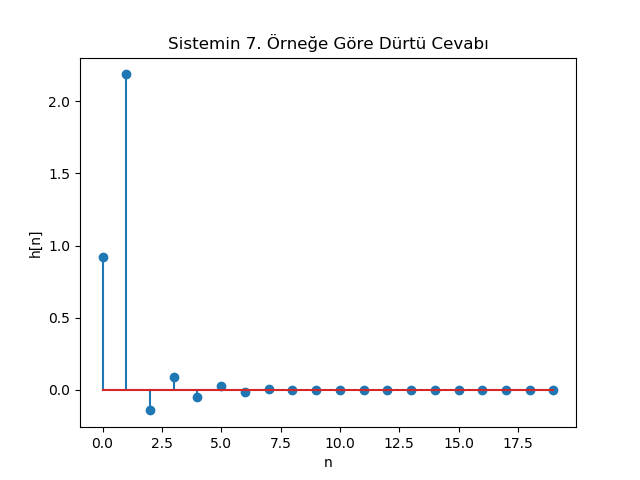

C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'Sistemin 7. Örneğe Göre Dürtü Cevabı')

In [304]:
n=np.arange(0,20,1)
xn7=np.zeros(len(n))
for k in range(len(n)):
    xn7[k]=2*dirac(n[k]-1)+dirac(n[k])+(-0.96075)*math.pow(-1/2,(n[k]))*step(n[k]) + (0.88)*step(n[k])*math.pow(-1/3,(n[k]))
plt.figure()
plt.stem(n,xn7)
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title("Sistemin 7. Örneğe Göre Dürtü Cevabı")
 

<IPython.core.display.Javascript object>


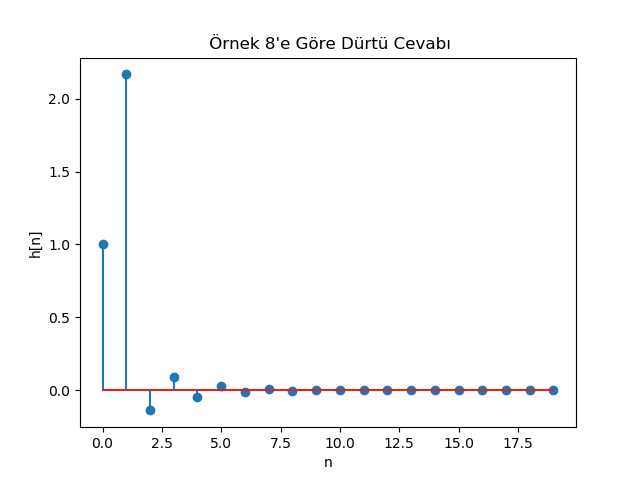

C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, " Örnek 8'e Göre Dürtü Cevabı")

In [305]:
# Dürtü Cevabının 8. örneğe göre yazılması..
num = np.array([1,3,11/6,1/3]) 
denum = np.array([1,5/6,1/6,0]) 
n, x = sgnl.dimpulse((num, denum, 1),x0=0, n=20)
plt.figure()
plt.stem(n,np.squeeze(x))
plt.xlabel("n")
plt.ylabel("h[n]")
plt.title(" Örnek 8'e Göre Dürtü Cevabı")

<IPython.core.display.Javascript object>


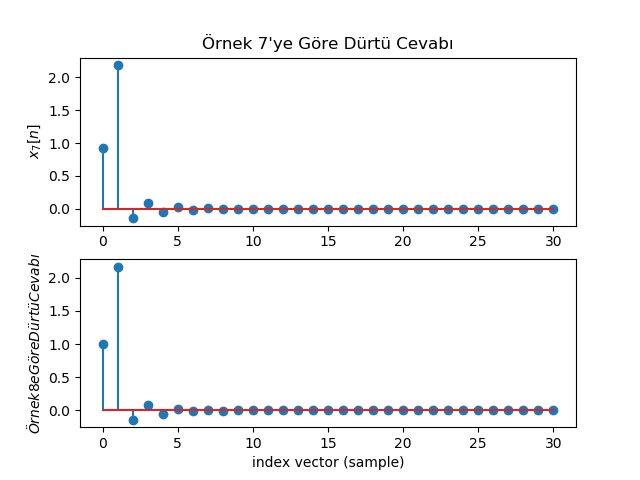

C:\anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
C:\anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 0, 'index vector (sample)')

In [321]:
## Örnek 9 yolu ile iki çözümün yorumlanması 
# örnek 7 
n=np.arange(0,31,1)
xn7=np.zeros(len(n))
for k in range(len(n)):
    xn7[k]=2*dirac(n[k]-1)+dirac(n[k])+(-0.96075)*math.pow(-1/2,(n[k]))*step(n[k]) + (0.88)*step(n[k])*math.pow(-1/3,(n[k]))
#örnek 8
num = np.array([1,3,11/6,1/3]) 
denum = np.array([1,5/6,1/6,0]) 
n8, x = sgnl.dimpulse((num, denum, 1),x0=0, n=31)

plt.figure()
plt.subplot(2,1,1), plt.stem(n, xn7), plt.ylabel('$x_{7}[n]$'),plt.title("Örnek 7'ye Göre Dürtü Cevabı")
plt.subplot(2,1,2), plt.stem(n8, np.squeeze(x)), plt.ylabel('$ Örnek 8 e Göre Dürtü Cevabı $')
plt.xlabel('index vector (sample)')


Yukarıdaki  grafiklerde de görükdüğü üzere iki farklı yoldan da sistemin dürtü cevabı aynı bulunmuştur.El ile hesaplanan h[n] ile de örnek 7 sonucu elde edilen h[n] aynı gelmiştir.

 #  Soru-4

$ H(Z)= \frac {10*(1-(\frac{1} {\sqrt(2)} )} {(1-e^{(j*\pi/4)*z^{-1}})*(1-e^{(-j*\pi/4)*z^{-1}})* (1-0.5*z^{-1}} $

$ Basit \space Kesirlere  \space Ayırma  \space  Yöntemi  \space Uygulanırsa:$

$ H(Z)= \frac {A_1} {(1-e^{(j*\pi/4)*z^{-1}})} + \frac {A_2} {(1-e^{(-j*\pi/4)}*z^{-1})} + \frac {A_3} {(1-0.5 z^{-1})*z^{-1}} $

$ A_1 \space hesaplanması \space için \space eşitliğin \space her \space tarafını \space  (1-e^{(j*\pi/4)}*z^{-1}) \space çarpıp \space $

$ z=e^{(j*\pi/4)} yerine \space konulursa $

$ A_1=5.960-3.256J \space olarak \space hesaplanır  $


$ A_2 \space hesaplanması \space için \space eşitliğin \space her \space tarafını \space  (1-e^{(-j*\pi/4)}*z^{-1}) \space çarpıp \space $

$ z=e^{(-j*\pi/4)} yerine \space konulursa $

$ A_2=5.960+3.256J \space olarak \space hesaplanır  $


$ A_3 \space hesaplanması \space için \space eşitliğin \space her \space tarafını \space  (1-0.5*z^{-1}) \space çarpıp \space $

$ z=0.5 yerine \space konulursa $

$ A_3=-1.90 \space olarak \space hesaplanır  $



In [319]:
# Örnek 7'ye göre Dürtü Cevabının Bulunması 
z = np.array([0.707]) # sistemin sıfırı
pole1 = 1/2 # sistemin kutupları pole1 pole2 ve pole3
pole2 = 0.707 + 0.707j
pole3 = 0.707 - 0.707j

p = np.array([pole1, pole2, pole3]) 
b, a = sgnl.zpk2tf(z, p, 10) #gain k=10  (h(z) yazıldığında sistemin kazancının 10 olduğu görülmüştür)


r, p, k = sgnl.residuez(b,a) 
print(r)
print(p)
print(k)

poless = np.roots(a)

[-1.90713804+0.j          5.95356902-3.25687583j  5.95356902+3.25687583j]
[0.5  +0.j    0.707+0.707j 0.707-0.707j]
[0.]


Yukarıda elde edilen değerler şu şekilde yazılarak aşağıda grafik çizimi yapılmıştır:
$ [\frac{r[0]} {1-p[0]*z^{-1}}] + [\frac{r[1]} {1-p[1]*z^{-1}}] + k[0]+ k[1] z^-1 +.... $

C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


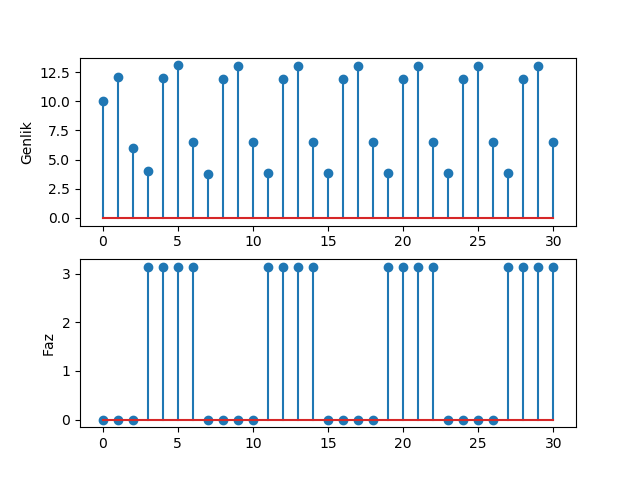

C:\anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


(<matplotlib.axes._subplots.AxesSubplot at 0x13350f9abc8>,
 <StemContainer object of 3 artists>,
 Text(0, 0.5, 'Faz'))

In [329]:
def step(n):# birim basamak Fonksiyonu
    if n >= 0:
        return 1
    else:
        return 0
n = np.arange(0,31,1)
x = np.zeros(len(n))
pi = np.pi


for k in range(len(n)):
    x[k]=(5.9535 - 3.2568j)*(np.exp(1j*pi*n[k]/4))*step(n[k]) + (5.9535 + 3.2568j)*np.exp(-1j*pi*n[k]/4)*step(n[k]) + (-1.9071)*((math.pow(1/2,n[k]))*step(n[k])) 
plt.figure()
plt.subplot(2,1,1), plt.stem(n, np.abs(x)),plt.ylabel("Genlik")
plt.subplot(2,1,2), plt.stem(n, np.angle(x)),plt.ylabel("Faz")
#!!
#Kompleks kökler nulunduğu için genlik ve faz olarak grafik çizimi yapılmıştır
#!!

<IPython.core.display.Javascript object>


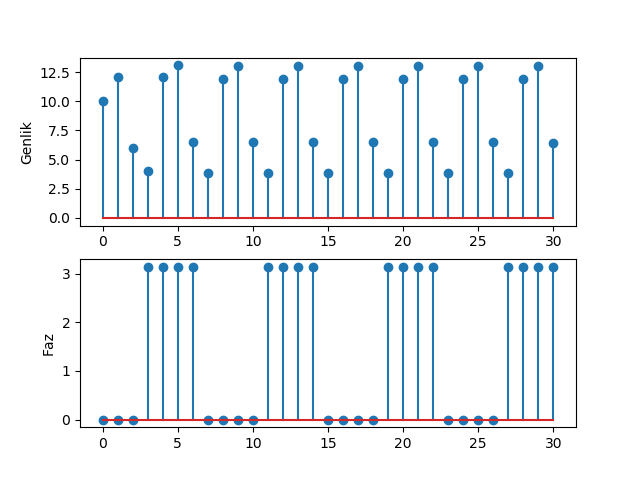

C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


(<matplotlib.axes._subplots.AxesSubplot at 0x13354b7c708>,
 <StemContainer object of 3 artists>,
 Text(0, 0.5, 'Faz'))

In [338]:
# Örnek 8'e göre Dürtü Cevabının Bulunması:
num = np.array([10, -7.071, 0, 0])  #10 7.071
denum = np.array([1, -1.914, 1.707, -0.5]) # coeffs of denum
n, x = sgnl.dimpulse((num, denum, 1),x0=0, n=31)
plt.figure()
plt.subplot(2,1,1), plt.stem(n, np.squeeze(np.abs(x))),plt.ylabel("Genlik")
plt.subplot(2,1,2), plt.stem(n, np.squeeze(np.angle(x))),plt.ylabel("Faz")
#!!
#Kompleks kökler nulunduğu için genlik ve faz olarak grafik çizimi yapılmıştır
#!!


31


C:\anaconda\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


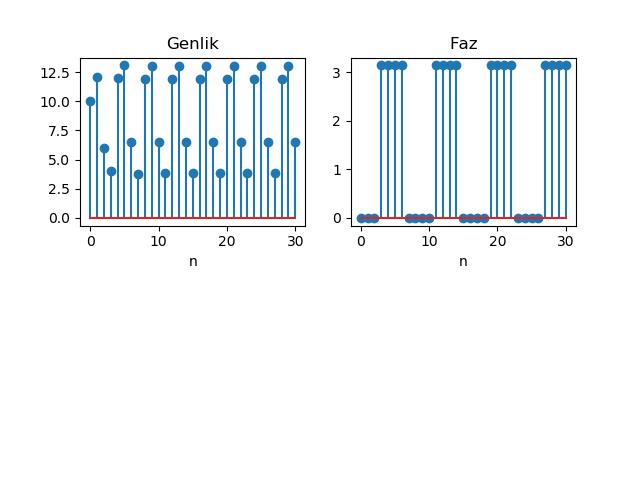

C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
C:\anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


<IPython.core.display.Javascript object>


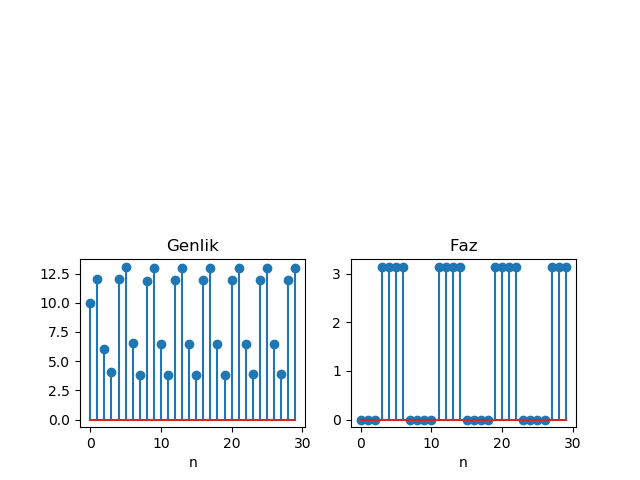

C:\anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


(<matplotlib.axes._subplots.AxesSubplot at 0x133550ce708>,
 <StemContainer object of 3 artists>,
 Text(0.5, 1.0, 'Faz'),
 Text(0.5, 0, 'n'))

In [339]:
# Örnek 9 da olduğu gibi her iki yollada çizilen grafiklerin karşılaştırılması

n = np.arange(0,31,1)
x = np.zeros(len(n))
pi = np.pi

#örnek7

for k in range(len(n)):
    x[k]=(5.9535 - 3.2568j)*(np.exp(1j*pi*n[k]/4))*step(n[k]) + (5.9535 + 3.2568j)*np.exp(-1j*pi*n[k]/4)*step(n[k]) + (-1.9071)*((math.pow(1/2,n[k]))*step(n[k])) 
plt.figure()
plt.subplot(2,2,1), plt.stem(n, np.abs(x)),plt.title("Genlik"),plt.xlabel("n")
plt.subplot(2,2,2), plt.stem(n, np.angle(x)),plt.title("Faz"),plt.xlabel("n")


# Örnek 8

num = np.array([10, -7.071, 0, 0])  #10 7.071
denum = np.array([1, -1.914, 1.707, -0.5]) # coeffs of denum
n8, x8 = sgnl.dimpulse((num, denum, 1),x0=0, n=30)
plt.figure()
plt.subplot(2,2,3), plt.stem(n8, np.squeeze(np.abs(x8))),plt.title("Genlik"),plt.xlabel("n")
plt.subplot(2,2,4), plt.stem(n8, np.squeeze(np.angle(x8))),plt.title("Faz"),plt.xlabel("n")


# Yukarıdaki  grafiklerde de görüldüğü üzere iki farklı yoldan da sistemin dürtü cevabı aynı bulunmuştur.El ile hesaplanan h[n] ile de örnek 7 sonucu elde edilen h[n] aynı gelmiştir.